# How quality of RandomForestClassifier model depends on different parameters

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [143]:
np.random.seed(42)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Explore the issue on the sklearn digits dataset.  
Link [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

### Some preparation

In [144]:
X, y = sklearn.datasets.load_digits(return_X_y=True)

In [145]:
n_estimators = np.arange(1, 200, 10, dtype=int)
max_features = np.arange(1, X.shape[1], dtype=int)
max_depth = np.arange(3, 50, 2, dtype=int)

In [151]:
def get_dependency(crossval_list, param_name, title):
    plt.figure()
    plt.xlabel(param_name)
    plt.ylabel('Crossval mean accuracy')
    xx = [x[0] for x in crossval_list]
    yy = [x[1] for x in crossval_list]
    plt.plot(xx, yy, '.-')
    plt.title(title)
    plt.show()

### Dependence on the number of trees

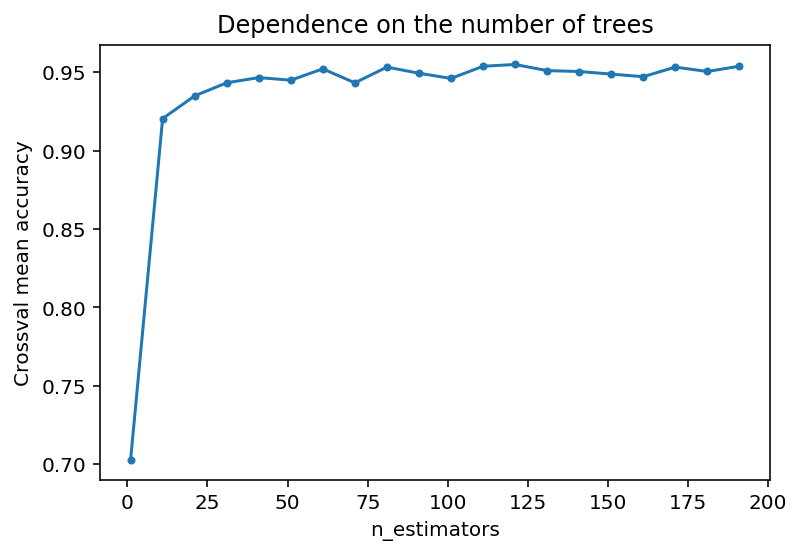

In [152]:
crossval_list = []
for value in n_estimators:
    model=RandomForestClassifier(n_estimators=value).fit(X, y)
    crossval_mean_score = cross_val_score(model, X=X, y=y, cv=10, n_jobs=-1).mean()
    crossval_list.append((value, crossval_mean_score))
    
get_dependency(crossval_list, 'n_estimators', 'Dependence on the number of trees')

If the number of trees is less than ~10, the accuracy is significantly bad. Let's consider accuracy more deeply again at this scale.

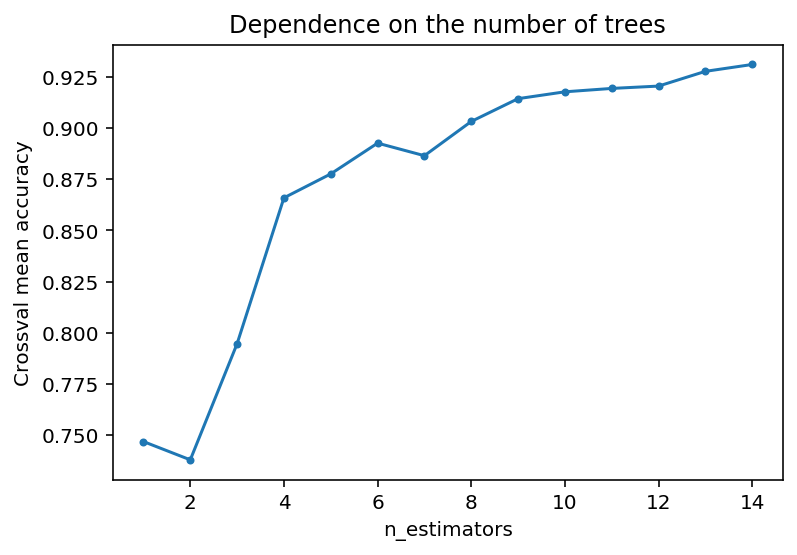

In [158]:
crossval_list = []

for value in np.arange(1, 15, 1):
    model=RandomForestClassifier(n_estimators=value).fit(X, y)
    crossval_mean_score = cross_val_score(model, X=X, y=y, cv=10, n_jobs=-1).mean()
    crossval_list.append((value, crossval_mean_score))
    
get_dependency(crossval_list, 'n_estimators', 'Dependence on the number of trees')

From 1 Tree to 14 Trees in Forest accuracy increases by approx 20%.  
Then it varies between 0.925 to 0.950 and is almost independent of the number of trees.

### Dependence on the number of features to consider for the best split during single tree construction

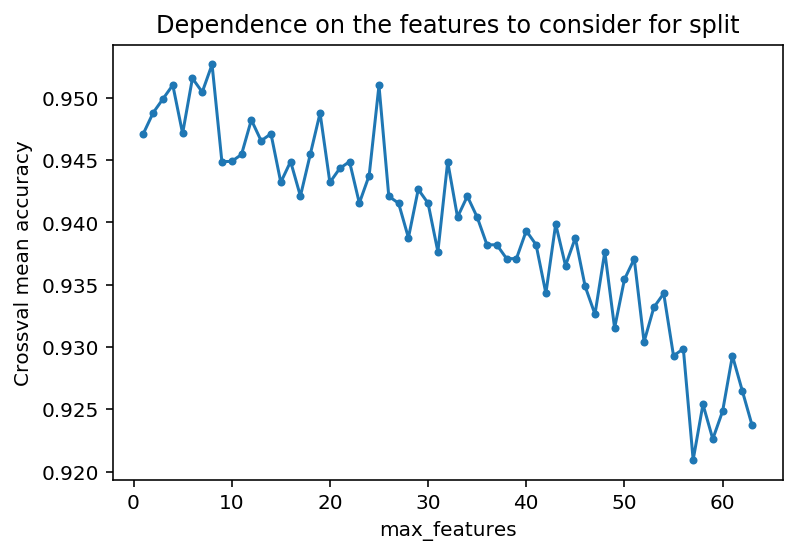

In [154]:
crossval_list = []
for value in max_features:
    model=RandomForestClassifier(max_features=value).fit(X, y)
    crossval_mean_score = cross_val_score(model, X=X, y=y, cv=10, n_jobs=-1).mean()
    crossval_list.append((value, crossval_mean_score))
get_dependency(crossval_list, 'max_features', 'Dependence on the features to consider for split')

There is a clear tendency of accuracy decreasing with the number of features increasing. The less features are used in every node, the more generalizable Random Forest model is. So up to 10 features is a good choice.

### Dependence on the maximum tree depth

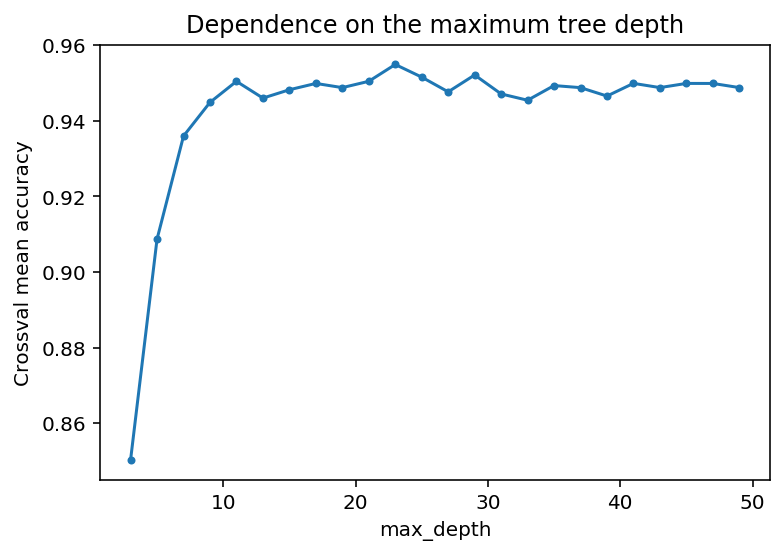

In [155]:
crossval_list = []
for value in max_depth:
    model=RandomForestClassifier(max_depth=value).fit(X, y)
    crossval_mean_score = cross_val_score(model, X=X, y=y, cv=10, n_jobs=-1).mean()
    crossval_list.append((value, crossval_mean_score))
get_dependency(crossval_list, 'max_depth','Dependence on the maximum tree depth')

Forest with trees without limit on depth work much more precisely than forest with up to 10 trees. One can afford use deeper trees without concern for the overfitting. Forest model reduces this risk because results are averaged over the trees. That is why from the depth of 15 accuracy become approximately constant.